In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [3]:
import numpy as np

def sigmoid(x):
  """
  Applies the sigmoid function to the input.

  Args:
      x: The input value (can be a single number or a NumPy array).

  Returns:
      The output of the sigmoid function.
  """
  return 1 / (1 + np.exp(-x))

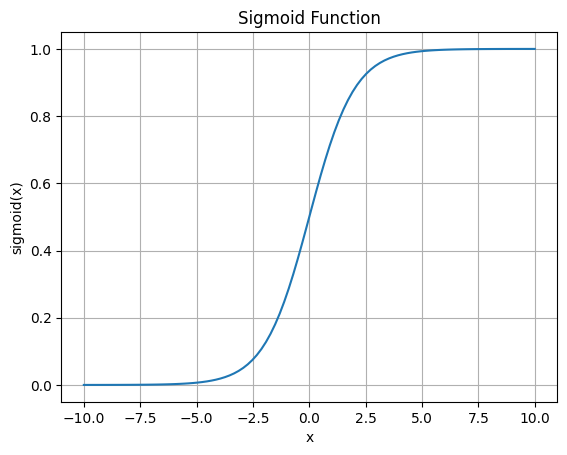

In [6]:
# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate sigmoid values
y = sigmoid(x)

# Create the plot
plt.plot(x, y)
plt.title("Sigmoid Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid(True)
plt.show()

#tails out at -6 & 6

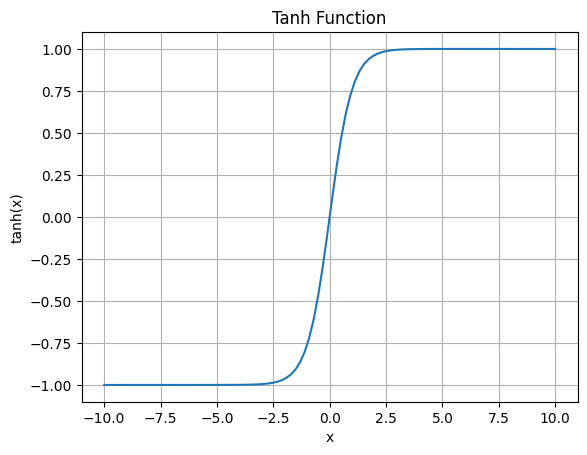

In [7]:
def tanh(x):
  """Applies the tanh function."""
  return np.tanh(x)

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate tanh values
y = tanh(x)

# Create the plot
plt.plot(x, y)
plt.title("Tanh Function")
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.grid(True)
plt.show()

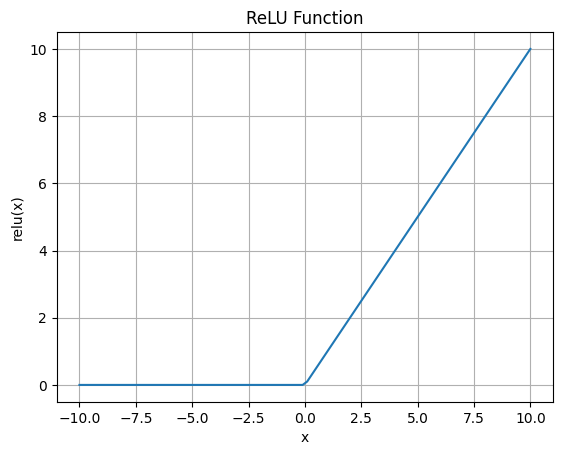

In [8]:
def relu(x):
  """Applies the ReLU function."""
  return np.maximum(0, x)

# Generate x values
x = np.linspace(-10, 10, 100)

# Calculate ReLU values
y = relu(x)

# Create the plot
plt.plot(x, y)
plt.title("ReLU Function")
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.grid(True)
plt.show()

In [9]:
#Build an application - Based on letters dataset

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 1. Load and Preprocess MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# 2. Build the Model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# 3. Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 25ms/step - accuracy: 0.8897 - loss: 0.3608
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - accuracy: 0.9825 - loss: 0.0578
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 47s 25ms/step - accuracy: 0.9878 - loss: 0.0398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 25ms/step - accuracy: 0.9896 - loss: 0.0317
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9921 - loss: 0.0241
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9852 - loss: 0.0421
Test accuracy: 0.9894000291824341


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


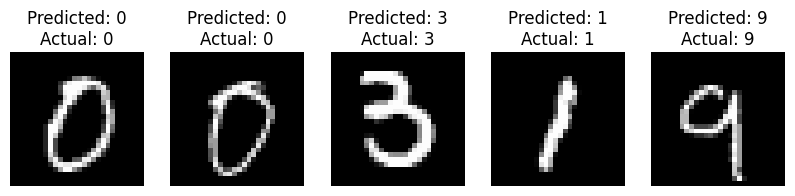

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# ... (Previous code for loading, preprocessing, building,
#     compiling, and training the model remains the same) ...

# 6. Visualize Predictions
# Select a few random examples from the test set
num_examples = 5
random_indices = np.random.choice(x_test.shape[0], num_examples)
example_images = x_test[random_indices]
example_labels = y_test[random_indices]

# Make predictions on the examples
predictions = model.predict(example_images)

# Display the images and predictions
plt.figure(figsize=(10, 5))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(example_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}\nActual: {np.argmax(example_labels[i])}")
    plt.axis('off')
plt.show()